# Exoplanets - Coursework Submission: Exercise 1
### Steven Dillmann

**MPhil Data Intensive Science | University of Cambridge**

21st June 2024

[sd2022@cam.ac.uk](sd2022@cam.ac.uk)

This notebook was written by Steven Dillmann as part of the coursework submission for the *Exoplanets* module in the MPhil in Data Intensive Science at the University of Cambridge. The coursework assignment can be found here: [Exoplanets - Coursework Assignment](Exoplanets.pdf). The associated report can be found here: [Exoplanets - Coursework Report](report/exo_sd2022_report.pdf).


## Set-Up

### Installations

In [1]:
# Make sure necessary packages are installed
!pip install numpy
!pip install transitleastsquares
!pip install pandas
!pip install matplotlib
!python -m pip install lightkurve --upgrade


### Imports and Settings

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk
import transitleastsquares as tls

# Set up plotting style
plt.style.use('sd2022.mplstyle')
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'Gill Sans'
sd2022_blue = '#3772ff'
sd2022_red = '#FF033E'
sd2022_green = '#05a45c'
sd2022_purple = '#994d9e' 
sd2022_orange = '#ff8243'
sd2022_pink = '#df37d6'
sd2022_turq = '#30d5c8'
sd2022_gold = '#cfbd62' 
sd2022_silver = '#C0C0C0'
sd2022_bronze =  '#b08d57'

### Load Data

,time,flux,flag,error
0,1410.90743225,0.998314797878,0,0.000939205696
1,1410.90882117,0.998582243919,0,0.000939460937
2,1410.91021009,0.999085783958,0,0.000940261350
3,1410.91159900,0.998662114143,0,0.000939822930
4,1410.91298792,0.998961329460,0,0.000939934747


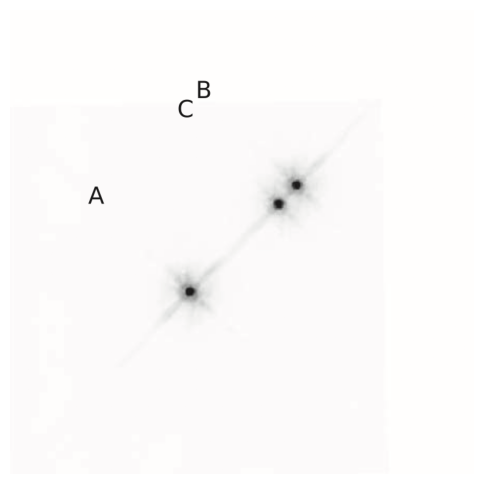

In [3]:
# Load TESS image 
image_path = '../data/ex1_stars_image.png'
img = plt.imread(image_path)
plt.figure(figsize=(5,5))
plt.xlim(5, 770)
plt.ylim(768, 2)
plt.axis('off')
plt.imshow(img)

# Load the TESS lightcurve data
data_path = '../data/ex1_tess_lc.txt'
data = np.loadtxt(data_path, delimiter=' ')
df = pd.read_csv(data_path, delimiter=' ', header=None, names=['time', 'flux', 'flag', 'error']).drop([0,1,2,3]).reset_index(drop=True)
df = df[df['flag'] != 0].reset_index(drop=True)
df.head()

## 1. Analyse the lightcurve to identify the strongest period

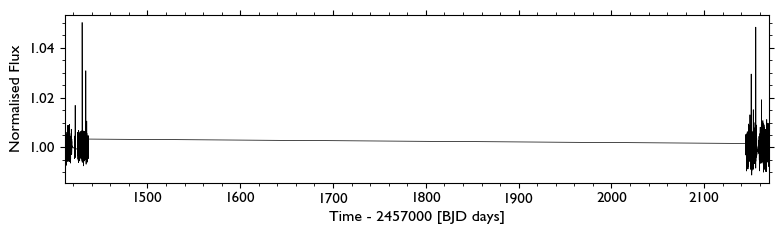

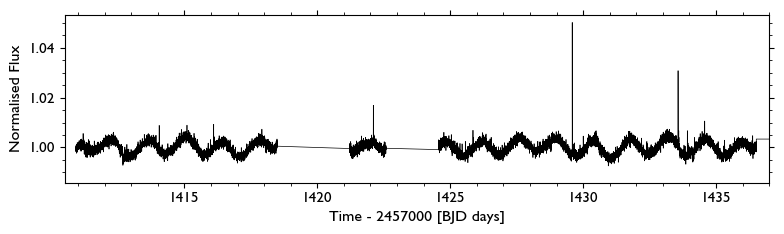

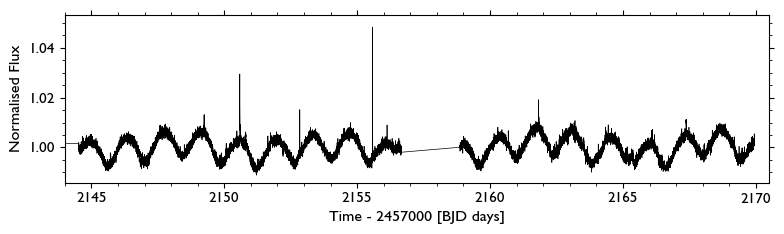

In [4]:
# === Analyse and display the lightcurve ======================================

# Define lightkurve object
time = data[:,0]
flux = data[:,1]
error = data[:,3]
lc = lk.LightCurve(time=time, flux=flux, flux_err=error)

# Define start and end of the two segments
start1 = 1410.5
end1 = 1437
start2 = 2144
end2 = 2170.5

# Display the raw lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc.plot(ax=ax, color = 'black')
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc.plot(ax=ax, color = 'black')
ax.set_xlim(start1, end1)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc.plot(ax=ax, color = 'black')
ax.set_xlim(start2, end2)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
plt.show()


Max power: 0.00390712343568091
Strongest period: 1.39837 d


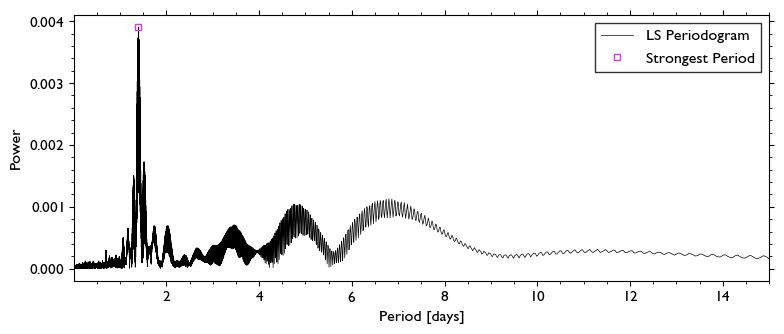

In [5]:
# === Periodogram analysis ====================================================

# Create a Lomb-Scargle periodogram
pg = lc.to_periodogram(maximum_period=15)

# Find the strongest period before filtering
max_power = pg.max_power
strongest_period = pg.period_at_max_power
print(f"Max power: {max_power}")
print(f"Strongest period: {strongest_period:.5f}")

# Plot the periodogram
fig, ax = plt.subplots()
pg.plot(ax=ax, color = 'k', label='LS Periodogram', view='period')
ax.plot(strongest_period, max_power, 's', mec = sd2022_pink, mfc = 'none', label='Strongest Period')
ax.set_xlabel('Period [days]')
ax.set_ylabel('Power')
# ax.set_xscale('log')
ax.legend()
plt.show()


## 2. Filter the lightcurve to search for any planet candidate(s)

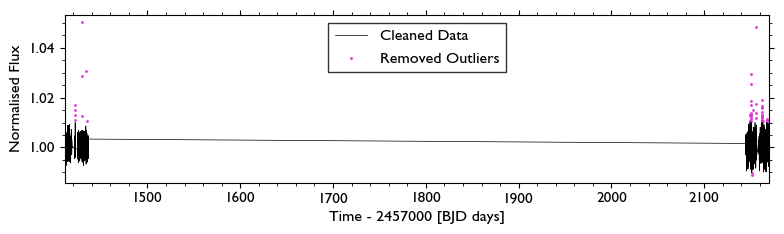

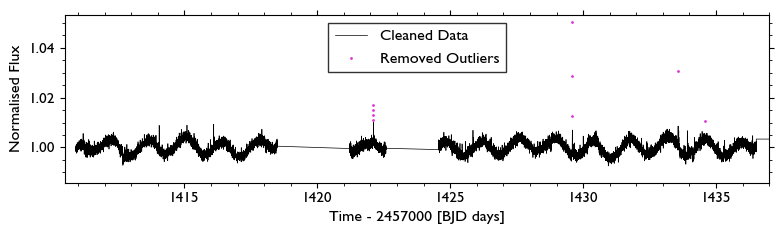

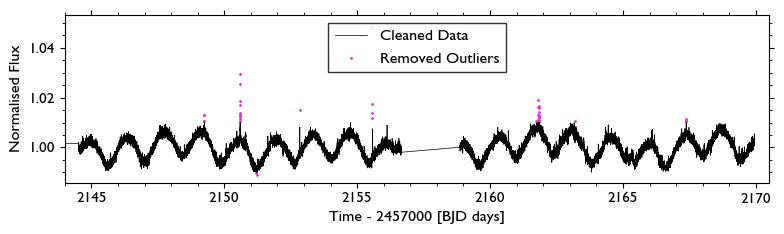

In [6]:
# === Remove outliers in the lightcurve =======================================

# Remove outliers 
lc_no, out_mask = lc.remove_outliers(sigma=3, return_mask=True)
lc_out = lc[out_mask]

# Display the lightcurve with outliers removed
fig, ax = plt.subplots(figsize=(8,2.5))
lc_no.plot(ax=ax, color = 'k', label = 'Cleaned Data')
lc_out.scatter(ax=ax, color = sd2022_pink, label = 'Removed Outliers')
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center')
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_no.plot(ax=ax, color = 'k', label = 'Cleaned Data')
lc_out.scatter(ax=ax, color = sd2022_pink, label = 'Removed Outliers')
ax.set_xlim(start1, end1)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center')
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_no.plot(ax=ax, color = 'k', label = 'Cleaned Data')
lc_out.scatter(ax=ax, color = sd2022_pink, label = 'Removed Outliers')
ax.set_xlim(start2, end2)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center')
plt.show()




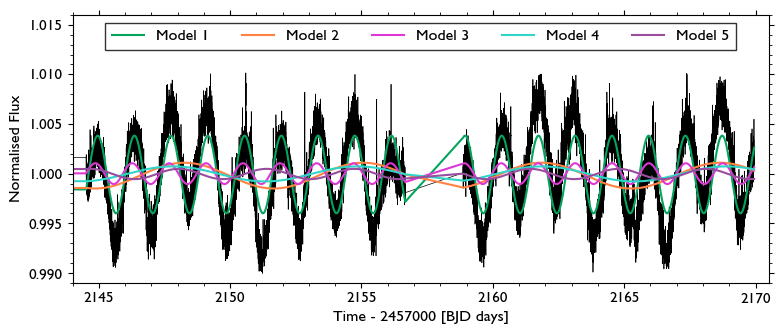

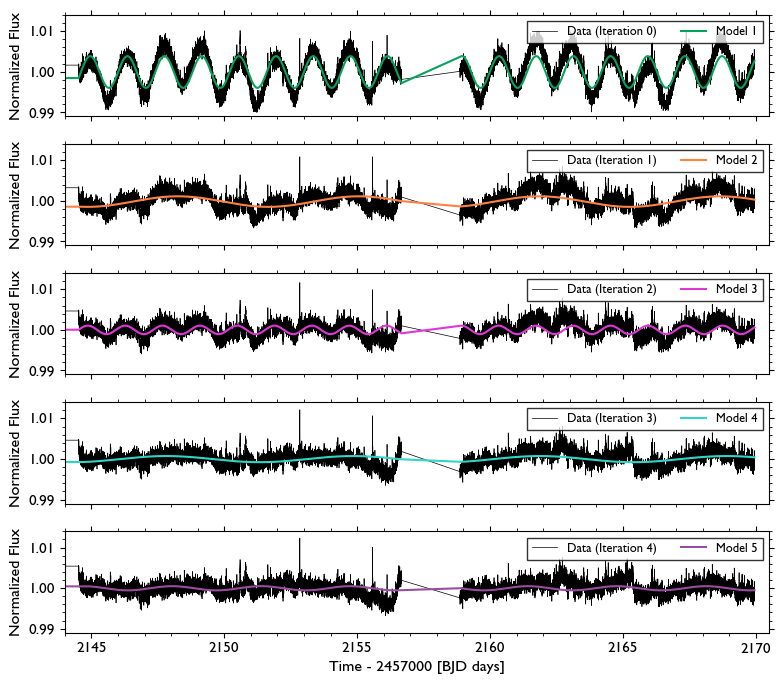

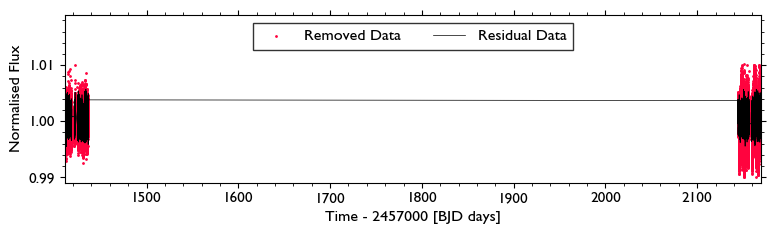

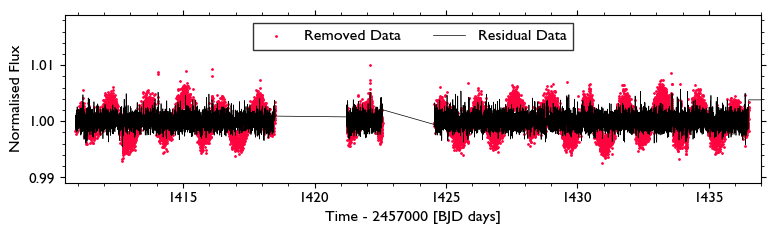

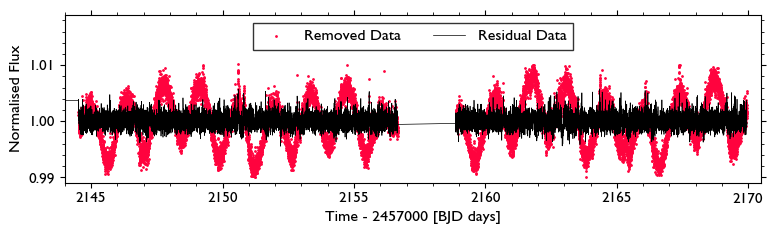

In [7]:
# === Remove long-term variability ============================================

# Define a function to fit a sine wave to the lightcurve
def sine_fitting(lc):
  lc_new = lc.copy()
  pg = lc_new.to_periodogram()
  model = pg.model(time=lc_new.time, frequency=pg.frequency_at_max_power)
  lc_new.flux = lc_new.flux / model.flux
  return lc_new, model

# Iterative sine fitting (demonstration)
colors = [sd2022_green, sd2022_orange, sd2022_pink, sd2022_turq, sd2022_purple]
iterations = 5
lc_new = lc_no.copy()
fig, ax = plt.subplots()
lc_new.plot(ax=ax, color = 'k')
for i in range(iterations):
    lc_new, model = sine_fitting(lc_new)
    model.plot(ax=ax, color = colors[i], lw=1.5, label = 'Model ' + str(i+1))
    ax.set_xlabel('Time - 2457000 [BJD days]')
    ax.set_ylabel('Normalised Flux')
    ax.set_xlim(start2, end2)
    ax.set_ylim(0.989, 1.016)
    ax.legend(loc = 'upper center', ncol = 5)
plt.show()

# Iterative sine fitting to remove high-frequency variability
iterations = 50
show_iter = 5
lc_new = lc_no.copy()
fig, axs = plt.subplots(nrows=show_iter, ncols=1, figsize=(8, 7), sharex=True) 
for i in range(iterations):
    if i < show_iter:
        lc_new.plot(ax=axs[i], color='k', label='Data (Iteration ' + str(i) + ')')
        lc_new, model = sine_fitting(lc_new)
        model.plot(ax=axs[i], color=colors[i], lw=1.5, label='Model ' + str(i+1))
        axs[i].legend(loc='upper right', ncol=2, fontsize=9)
        axs[i].set_xlabel(None)
    else:
        lc_new, model = sine_fitting(lc_new)
axs[-1].set_xlabel('Time - 2457000 [BJD days]')
axs[-1].set_xlim(start2, end2)
for ax in axs:
    ax.set_ylim(0.989, 1.014)
plt.show()

# Flatten to remove low-frequency variability
lc_new = lc_new.flatten(500)

# Remove 5-sigma outliers from the flattened lightcurve
lc_new = lc_new.remove_outliers(sigma=5)
  
# Display the flattened lightcurve
color_out = sd2022_red
fig, ax = plt.subplots(figsize=(8,2.5))
lc_no.scatter(ax=ax, color = color_out, label = 'Removed Data')
lc_new.plot(ax=ax, color = 'black', label = 'Residual Data')
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
ax.set_ylim(0.989, 1.019)
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_no.scatter(ax=ax, color = color_out, label = 'Removed Data')
lc_new.plot(ax=ax, color = 'black', label = 'Residual Data')
ax.set_xlim(start1, end1)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
ax.set_ylim(0.989, 1.019)
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_no.scatter(ax=ax, color = color_out, label = 'Removed Data')
lc_new.plot(ax=ax, color = 'black', label = 'Residual Data')
ax.set_xlim(start2, end2)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
ax.set_ylim(0.989, 1.019)
plt.show()


Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 33 durations
Searching 31402 data points, 24478 periods from 2.0 to 7.0 days
Using all 12 CPU threads


100%|██████████| 24478/24478 periods | 01:18<00:00


Searching for best T0 for period 5.35864 days


100%|██████████| 13029/13029 [00:06<00:00, 1978.06it/s]
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/transitleastsquares/main.py:411: UserWarning: 134 of 142 transits without data. The true period may be twice the given period.
  warnings.warn(text)


Best-fit period: 5.35864


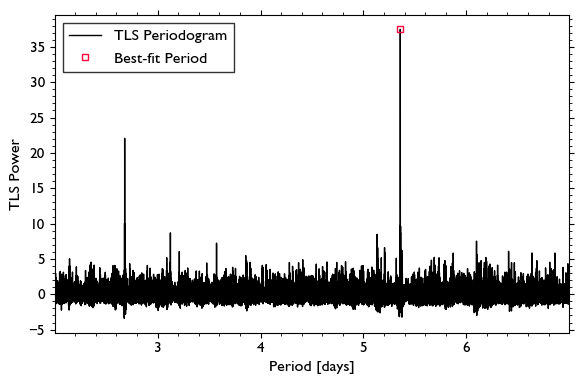

Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 262 durations
Searching 31402 data points, 536 periods from 5.3 to 5.4 days
Using all 12 CPU threads


100%|██████████| 536/536 periods | 00:57<00:00


Searching for best T0 for period 5.35871 days


100%|██████████| 31402/31402 [00:15<00:00, 2073.15it/s]


Best-fit period: 5.35871+-0.00028
Best-fit t0: 1412.71278078738 (2458412.7127807876) days
Best-fit depth: 0.99805
Depth (mean+-error): 0.9980679777+-0.0002316168
Depth reduction: 0.0019465736+-0.0002316168
SNR: 6.54792


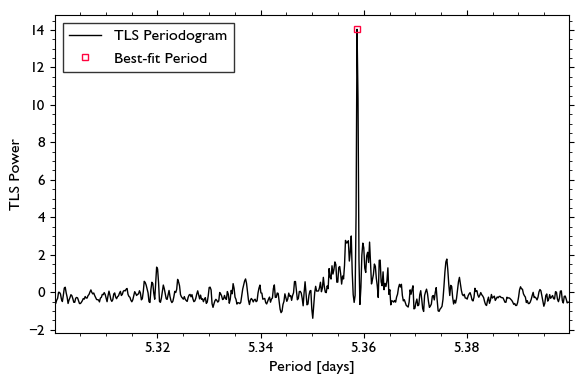

In [8]:
# === Periodogram analysis to search for transits =============================

# Create a Transit Least Squares periodogram
min_period = 2
max_period = 7
pg_tls = tls.transitleastsquares(lc_new.time.value, lc_new.flux.value, lc_new.flux_err.value)
out_tls = pg_tls.power(period_min=min_period, period_max=max_period, show_progress_bar=True, verbose=True)
power = out_tls.SDE
period = out_tls.period
print(f"Best-fit period: {period:.5f}")

# Plot the periodogram
color_model = sd2022_red
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(out_tls.periods, out_tls.power, color = 'black', label='TLS Periodogram')
ax.plot(period, power, 's', mec = color_model , mfc = 'none', label='Best-fit Period')
ax.set_xlabel('Period [days]')
ax.set_ylabel('TLS Power')
ax.legend(loc = 'upper left')
plt.show()

# Create a finer TransitLeastSquares periodogram
min_period = 5.3
max_period = 5.4
pg_tls = tls.transitleastsquares(lc_new.time.value, lc_new.flux.value, lc_new.flux_err.value)
out_tls = pg_tls.power(period_min=min_period, period_max=max_period, show_progress_bar=True, verbose=True, T0_fit_margin=0, duration_grid_step=1.01, oversampling_factor=5)
power = out_tls.SDE
power_raw = out_tls.power_raw
period = out_tls.period
period_err = out_tls.period_uncertainty
t0 = out_tls.T0
depth_best = out_tls.depth
depth_mean = out_tls.depth_mean[0]
depth_err = out_tls.depth_mean[1]
snr = out_tls.snr
flux_reduction = 1 - depth_best
print(f"Best-fit period: {period:.5f}+-{period_err:.5f}")
print(f"Best-fit t0: {t0} ({t0 + 2457000}) days")
print(f"Best-fit depth: {depth_best:.5f}")
print(f"Depth (mean+-error): {depth_mean:.10f}+-{depth_err:.10f}")
print(f"Depth reduction: {flux_reduction:.10f}+-{depth_err:.10f}")
print(f"SNR: {snr:.5f}")

# Plot the finer periodogram
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(out_tls.periods, out_tls.power, color = 'black', label='TLS Periodogram')
ax.plot(period, power, 's', mec = color_model, mfc = 'none', label='Best-fit Period')
ax.set_xlabel('Period [days]')
ax.set_ylabel('TLS Power')
ax.legend(loc = 'upper left')
plt.show()




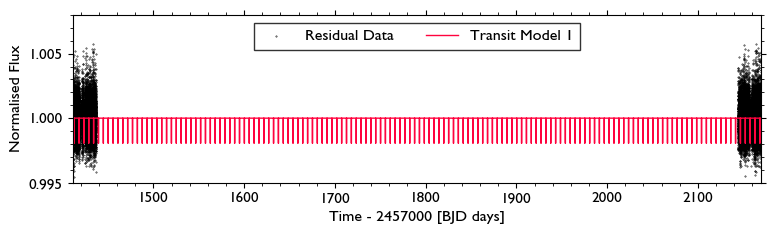

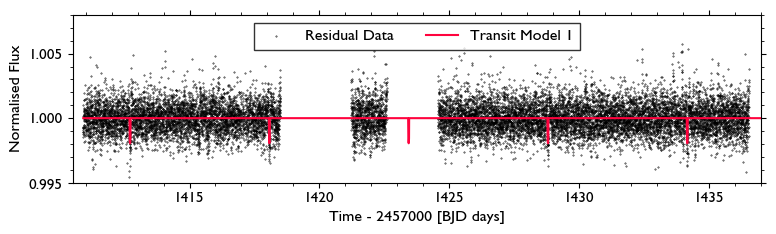

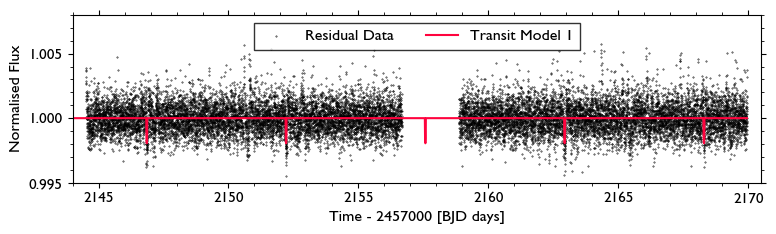

Duration of the transit: 0.05339 days


In [9]:
# === Plot lightcurve with transit models =====================================

# Plot lightcurve with transit models
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new.scatter(ax=ax, color = 'black', label = 'Residual Data', s=0.5)
ax.plot(out_tls.model_lightcurve_time, out_tls.model_lightcurve_model, color = color_model, lw = 1, label='Transit Model 1')
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new.scatter(ax=ax, color = 'black', label = 'Residual Data', s=0.5)
ax.plot(out_tls.model_lightcurve_time, out_tls.model_lightcurve_model, color = color_model, lw = 1.5, label='Transit Model 1')
ax.set_xlim(start1, end1)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new.scatter(ax=ax, color = 'black', label = 'Residual Data', s=0.5)
ax.plot(out_tls.model_lightcurve_time, out_tls.model_lightcurve_model, color = color_model, lw = 1.5, label='Transit Model 1')
ax.set_xlim(start2, end2)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
plt.show()

# Estimate duration of the transit
ix1 = np.where(out_tls.model_lightcurve_model != 1)[0][0]
ix2 = np.where(out_tls.model_lightcurve_model[ix1:] == 1)[0][0] + ix1 
duration1 = out_tls.model_lightcurve_time[ix2+1] - out_tls.model_lightcurve_time[ix1-1]
print(f"Duration of the transit: {duration1:.5f} days")



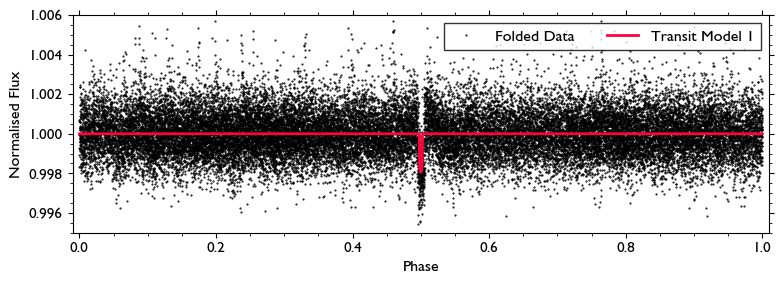

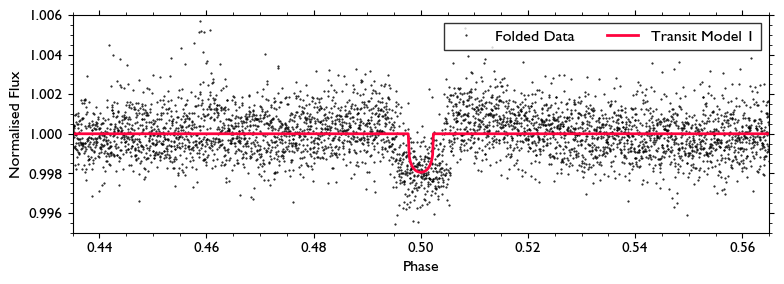

In [10]:
# === Phase-folded lightcurve =================================================

# Plot phase-folded lightcurve
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(out_tls.folded_phase, out_tls.folded_y, color = 'black', label = 'Folded Data', ls = 'none', marker = '.', markersize = 1)
ax.plot(out_tls.model_folded_phase, out_tls.model_folded_model, color = color_model, label='Transit Model 1', lw = 2)
ax.set_ylim(0.995, 1.006)
ax.set_xlim(-0.01, 1.01)
ax.set_xlabel('Phase')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper right', ncols = 2)
plt.show()

# Zoom in on the transit
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(out_tls.folded_phase, out_tls.folded_y, color = 'black', label = 'Folded Data', ls = 'none', marker = '.', markersize = 1)
ax.plot(out_tls.model_folded_phase, out_tls.model_folded_model, color = color_model, label='Transit Model 1', lw = 2)
ax.set_ylim(0.995, 1.006)
ax.set_xlim(0.435,0.565)
ax.set_xlabel('Phase')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper right', ncols = 2)
plt.show()


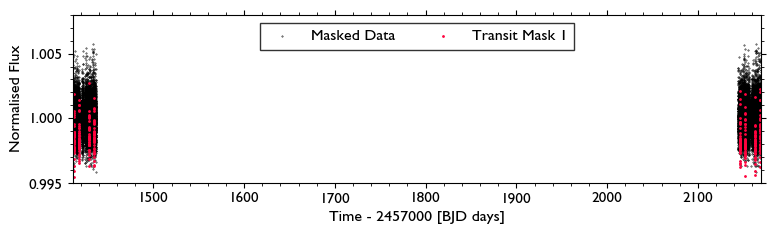

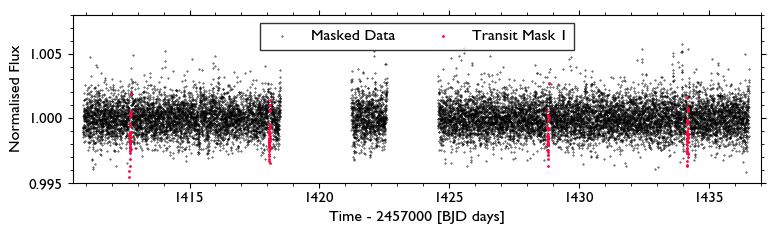

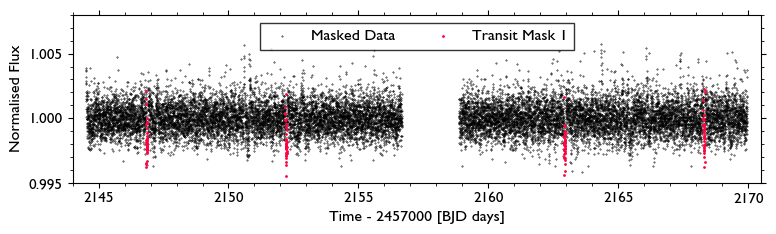

In [11]:
# === Create Transit Mask =====================================================

# Create a transit mask
mask = tls.transit_mask(lc_new.time.value, period, duration1, t0)
lc_new2 = lc_new[~mask]
lc_mask = lc_new[mask]
color_mask = sd2022_red

# Plot the transit mask
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new2.scatter(ax=ax, color = 'black', label = 'Masked Data', s=0.5)
lc_mask.scatter(ax=ax, color = color_mask, label = 'Transit Mask 1')
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new2.scatter(ax=ax, color = 'black', label = 'Masked Data',  s=0.5)
lc_mask.scatter(ax=ax, color = color_mask, label = 'Transit Mask 1')
ax.set_xlim(start1, end1)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new2.scatter(ax=ax, color = 'black', label = 'Masked Data', s=0.5)
lc_mask.scatter(ax=ax, color = color_mask, label = 'Transit Mask 1')
ax.set_xlim(start2, end2)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 2)
plt.show()

Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 33 durations
Searching 31093 data points, 24478 periods from 2.0 to 7.0 days
Using all 12 CPU threads


100%|██████████| 24478/24478 periods | 01:07<00:00


Searching for best T0 for period 3.12392 days


100%|██████████| 9777/9777 [00:05<00:00, 1933.39it/s]
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/transitleastsquares/main.py:411: UserWarning: 228 of 243 transits without data. The true period may be twice the given period.
  warnings.warn(text)


Best-fit period: 3.12392


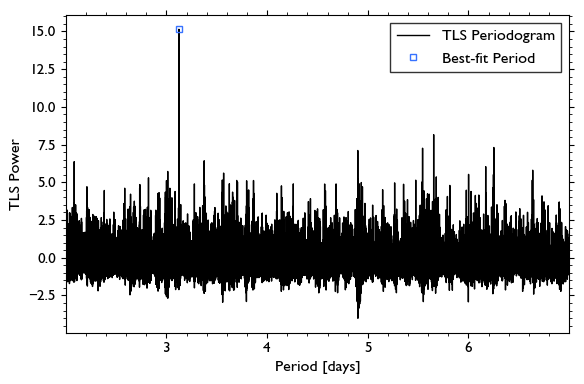

Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 254 durations
Searching 31093 data points, 1087 periods from 3.1 to 3.2 days
Using all 12 CPU threads


100%|██████████| 1087/1087 periods | 01:35<00:00


Searching for best T0 for period 3.12392 days


100%|██████████| 31093/31093 [00:16<00:00, 1909.89it/s]


Best-fit period: 3.12392+-0.00014
Best-fit t0: 1412.5796113400943 (2458412.57961134) days
Best-fit depth: 0.99922
Depth (mean+-error): 0.99902+-0.00034
Flux reduction: 0.0009830161+-0.0003420615
SNR: 3.78653


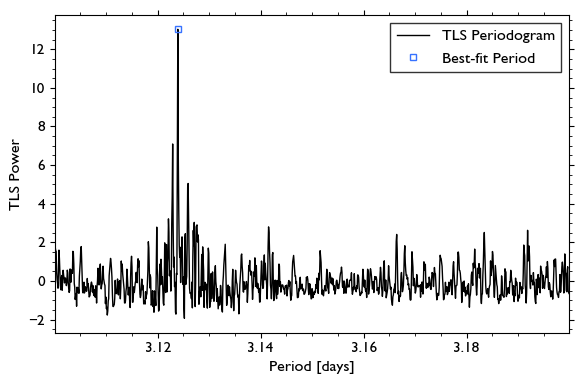

In [12]:
# === Periodogram analysis to search for second transit =======================

# Create a Transit Least Squares periodogram
min_period = 2
max_period = 7
pg_tls2 = tls.transitleastsquares(lc_new2.time.value, lc_new2.flux.value, lc_new2.flux_err.value)
out_tls2 = pg_tls2.power(period_min=min_period, period_max=max_period, show_progress_bar=True, verbose=True)
power2 = out_tls2.SDE
period2 = out_tls2.period
print(f"Best-fit period: {period2:.5f}")

# Plot the periodogram
color_model2 = sd2022_blue
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(out_tls2.periods, out_tls2.power, color = 'black', label='TLS Periodogram')
ax.plot(period2, power2, 's', mec = color_model2 , mfc = 'none', label='Best-fit Period')
ax.set_xlabel('Period [days]')
ax.set_ylabel('TLS Power')
ax.legend(loc = 'upper right')
plt.show()

# Create a Transit Least Squares periodogram
min_period = 3.1
max_period = 3.2
pg_tls2 = tls.transitleastsquares(lc_new2.time.value, lc_new2.flux.value, lc_new2.flux_err.value)
out_tls2 = pg_tls2.power(period_min=min_period, period_max=max_period, show_progress_bar=True, verbose=True, duration_grid_step=1.01, T0_fit_margin=0, oversampling_factor=5)
power2 = out_tls2.SDE
period2 = out_tls2.period
period_err2 = out_tls2.period_uncertainty
t02 = out_tls2.T0
depth_best2 = out_tls2.depth
depth_mean2 = out_tls2.depth_mean[0]
depth_err2 = out_tls2.depth_mean[1]
snr2 = out_tls2.snr
flux_reduction2 = 1 - depth_mean2
print(f"Best-fit period: {period2:.5f}+-{period_err2:.5f}")
print(f"Best-fit t0: {t02} ({t02 + 2457000}) days")
print(f"Best-fit depth: {depth_best2:.5f}")
print(f"Depth (mean+-error): {depth_mean2:.5f}+-{depth_err2:.5f}")
print(f"Flux reduction: {flux_reduction2:.10f}+-{depth_err2:.10f}")
print(f"SNR: {snr2:.5f}")

# Plot the periodogram
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(out_tls2.periods, out_tls2.power, color = 'black', label='TLS Periodogram')
ax.plot(period2, power2, 's', mec = color_model2, mfc = 'none', label='Best-fit Period')
ax.set_xlabel('Period [days]')
ax.set_ylabel('TLS Power')
ax.legend(loc = 'upper right')
plt.show()

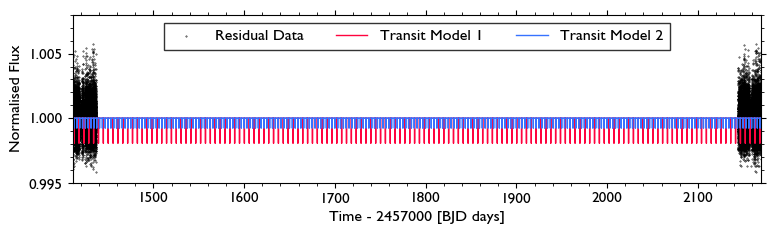

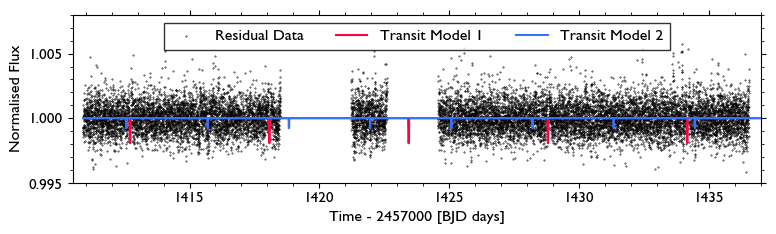

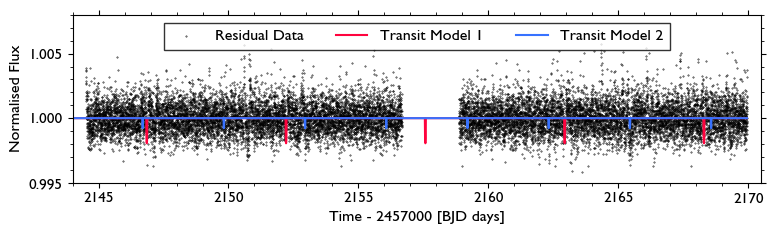

Duration of the transit: 0.01971 days


In [13]:
# === Plot lightcurve with transit models =====================================

# Plot lightcurve with transit models
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new2.scatter(ax=ax, color = 'black', label = 'Residual Data', s=0.5)
ax.plot(out_tls.model_lightcurve_time, out_tls.model_lightcurve_model, color = color_model, lw = 1, label='Transit Model 1')
ax.plot(out_tls2.model_lightcurve_time, out_tls2.model_lightcurve_model, color = color_model2, lw = 1, label='Transit Model 2', linestyle = '-')
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 3)
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new2.scatter(ax=ax, color = 'black', label = 'Residual Data', s=0.5)
ax.plot(out_tls.model_lightcurve_time, out_tls.model_lightcurve_model, color = color_model, lw = 1.5, label='Transit Model 1')
ax.plot(out_tls2.model_lightcurve_time, out_tls2.model_lightcurve_model, color = color_model2, lw = 1.5, label='Transit Model 2', linestyle = '-')
ax.set_xlim(start1, end1)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 3)
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new2.scatter(ax=ax, color = 'black', label = 'Residual Data', s=0.5)
ax.plot(out_tls.model_lightcurve_time, out_tls.model_lightcurve_model, color = color_model, lw = 1.5, label='Transit Model 1')
ax.plot(out_tls2.model_lightcurve_time, out_tls2.model_lightcurve_model, color = color_model2, lw = 1.5, label='Transit Model 2', linestyle = '-')
ax.set_xlim(start2, end2)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 3)
plt.show()

# Estimate duration of the transit
ix1 = np.where(out_tls2.model_lightcurve_model != 1)[0][0] 
ix2 = np.where(out_tls2.model_lightcurve_model[ix1:] == 1)[0][0] + ix1
duration2 = out_tls2.model_lightcurve_time[ix2-1] - out_tls2.model_lightcurve_time[ix1+1]
print(f"Duration of the transit: {duration2:.5f} days")

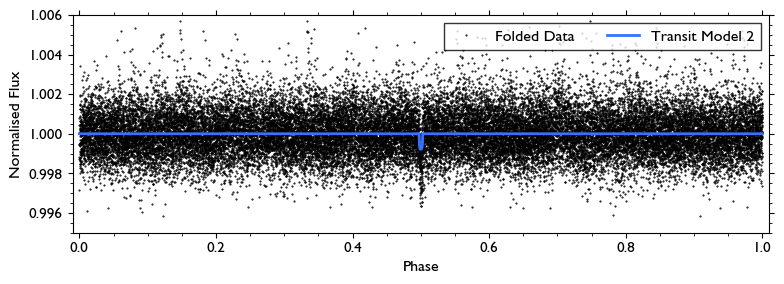

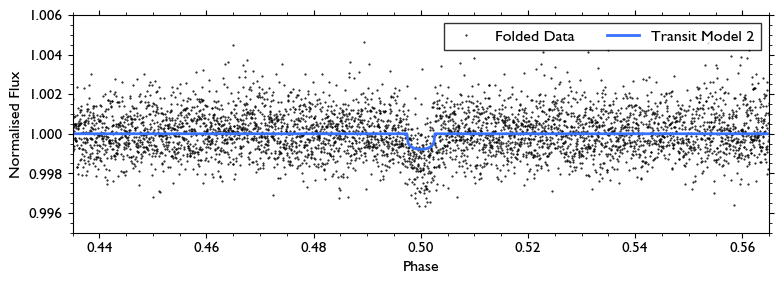

In [14]:
# === Phase-folded lightcurve =================================================

# Plot phase-folded lightcurve
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(out_tls2.folded_phase, out_tls2.folded_y, color = 'black', label = 'Folded Data', ls = 'none', marker = '.', markersize = 1)
ax.plot(out_tls2.model_folded_phase, out_tls2.model_folded_model, color = color_model2, label='Transit Model 2', lw = 2)
ax.set_ylim(0.995, 1.006)
ax.set_xlim(-0.01, 1.01)
ax.set_xlabel('Phase')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper right', ncols = 2)
plt.show()

# Zoom in on the transit
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(out_tls2.folded_phase, out_tls2.folded_y, color = 'black', label = 'Folded Data', ls = 'none', marker = '.', markersize = 1)
ax.plot(out_tls2.model_folded_phase, out_tls2.model_folded_model, color = color_model2, label='Transit Model 2', lw = 2)
ax.set_ylim(0.995, 1.006)
ax.set_xlim(0.435,0.565)
ax.set_xlabel('Phase')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper right', ncols = 2)
plt.show()

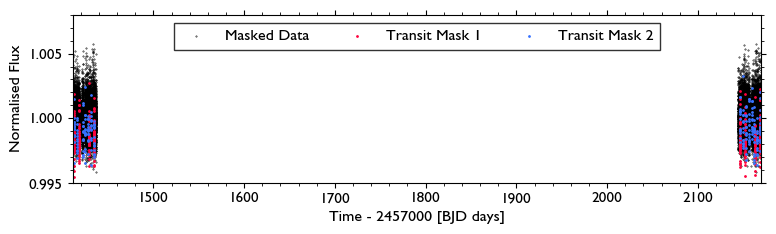

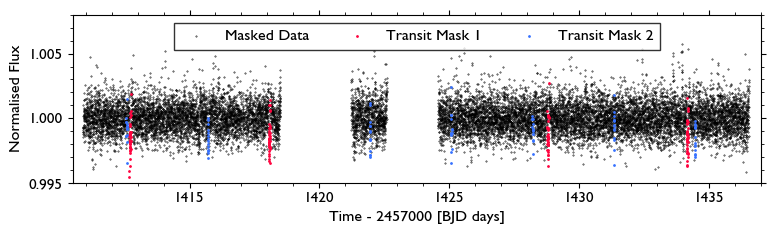

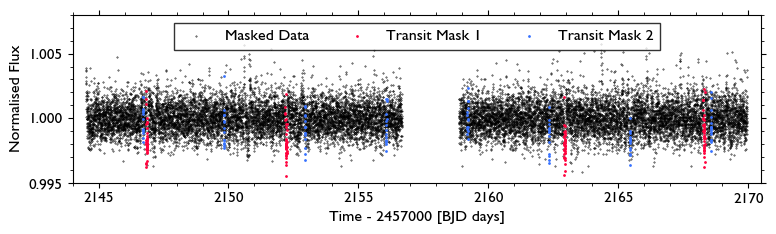

In [15]:
# === Create Transit Mask =====================================================

# Create a transit mask
mask2 = tls.transit_mask(lc_new2.time.value, period2, duration2, t02)
lc_new3 = lc_new2[~mask2]
lc_mask2 = lc_new2[mask2]
color_mask2 = sd2022_blue

# Plot the transit mask
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new3.scatter(ax=ax, color = 'black', label = 'Masked Data', s=0.5)
lc_mask.scatter(ax=ax, color = color_mask, label = 'Transit Mask 1')
lc_mask2.scatter(ax=ax, color = color_mask2, label = 'Transit Mask 2')
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 3)
plt.show()

# Show first part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new3.scatter(ax=ax, color = 'black', label = 'Masked Data',  s=0.5)
lc_mask.scatter(ax=ax, color = color_mask, label = 'Transit Mask 1')
lc_mask2.scatter(ax=ax, color = color_mask2, label = 'Transit Mask 2')
ax.set_xlim(start1, end1)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 3)
plt.show()

# Show second part of the lightcurve
fig, ax = plt.subplots(figsize=(8,2.5))
lc_new3.scatter(ax=ax, color = 'black', label = 'Masked Data', s=0.5)
lc_mask.scatter(ax=ax, color = color_mask, label = 'Transit Mask 1')
lc_mask2.scatter(ax=ax, color = color_mask2, label = 'Transit Mask 2')
ax.set_xlim(start2, end2)
ax.set_ylim(0.995, 1.008)
ax.set_xlabel('Time - 2457000 [BJD days]')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper center', ncols = 3)
plt.show()

Transit Least Squares TLS 1.32 (5 Apr 2024)
Creating model cache for 36 durations
Searching 30879 data points, 29772 periods from 2.0 to 10.0 days
Using all 12 CPU threads


100%|██████████| 29772/29772 periods | 01:18<00:00


Searching for best T0 for period 5.54403 days


100%|██████████| 5251/5251 [00:02<00:00, 2108.29it/s]
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/steven/anaconda3/envs/exo/lib/python3.9/site-packages/transitleastsquares/main.py:411: UserWarning: 130 of 137 transits without data. The true period may be twice the given period.
  warnings.warn(text)


Best-fit period: 5.54403+-0.00049
Best-fit t0: 1415.3236510884728 (2458415.3236510884) days
Best-fit depth: 0.99954
Depth (mean+-error): 0.99963+-0.00022
Flux reduction: 0.0003681369+-0.0002201077
SNR: 1.78297


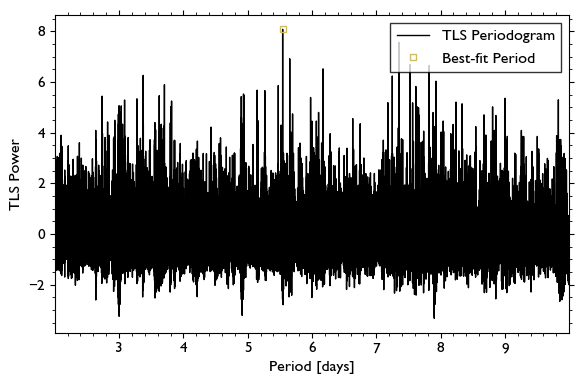

In [16]:
# === Periodogram analysis to search for other transits =======================

# Create a Transit Least Squares periodogram
min_period = 2
max_period = 10
pg_tls3 = tls.transitleastsquares(lc_new3.time.value, lc_new3.flux.value, lc_new3.flux_err.value)
out_tls3 = pg_tls3.power(period_min=min_period, period_max=max_period, show_progress_bar=True, verbose=True)
power3 = out_tls3.SDE
period3 = out_tls3.period
period_err3 = out_tls3.period_uncertainty
t03 = out_tls3.T0
depth_best3 = out_tls3.depth
depth_mean3 = out_tls3.depth_mean[0]
depth_err3 = out_tls3.depth_mean[1]
snr3 = out_tls3.snr
flux_reduction3 = 1 - depth_mean3
print(f"Best-fit period: {period3:.5f}+-{period_err3:.5f}")
print(f"Best-fit t0: {t03} ({t03 + 2457000}) days")
print(f"Best-fit depth: {depth_best3:.5f}")
print(f"Depth (mean+-error): {depth_mean3:.5f}+-{depth_err3:.5f}")
print(f"Flux reduction: {flux_reduction3:.10f}+-{depth_err3:.10f}")
print(f"SNR: {snr3:.5f}")

# Plot the periodogram
color_model3 = sd2022_gold
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(out_tls3.periods, out_tls3.power, color = 'black', label='TLS Periodogram')
ax.plot(period3, power3, 's', mec = color_model3 , mfc = 'none', label='Best-fit Period')
ax.set_xlabel('Period [days]')
ax.set_ylabel('TLS Power')
ax.legend(loc = 'upper right')
plt.show()

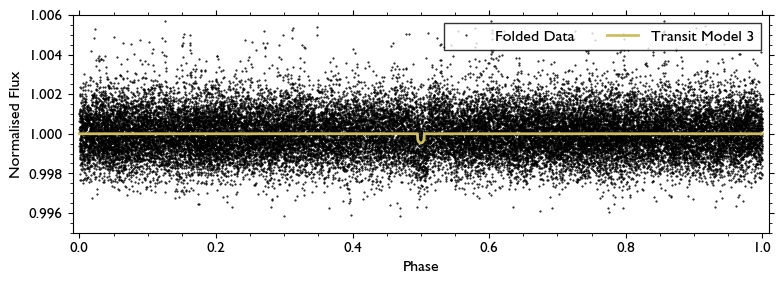

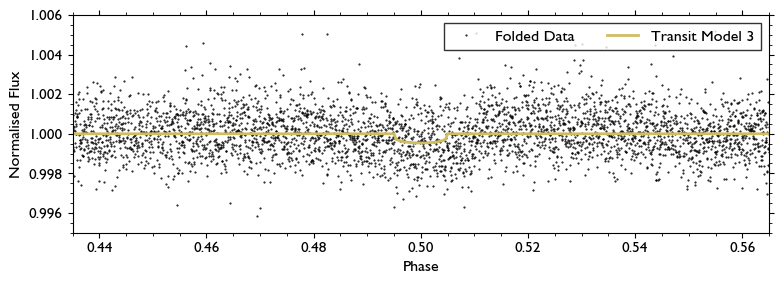

In [17]:
# === Phase-folded lightcurve =================================================

# Plot phase-folded lightcurve
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(out_tls3.folded_phase, out_tls3.folded_y, color = 'black', label = 'Folded Data', ls = 'none', marker = '.', markersize = 1)
ax.plot(out_tls3.model_folded_phase, out_tls3.model_folded_model, color = color_model3, label='Transit Model 3', lw = 2)
ax.set_ylim(0.995, 1.006)
ax.set_xlim(-0.01, 1.01)
ax.set_xlabel('Phase')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper right', ncols = 2)
plt.show()

# Zoom in on the transit
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(out_tls3.folded_phase, out_tls3.folded_y, color = 'black', label = 'Folded Data', ls = 'none', marker = '.', markersize = 1)
ax.plot(out_tls3.model_folded_phase, out_tls3.model_folded_model, color = color_model3, label='Transit Model 3', lw = 2)
ax.set_ylim(0.995, 1.006)
ax.set_xlim(0.435,0.565)
ax.set_xlabel('Phase')
ax.set_ylabel('Normalised Flux')
ax.legend(loc = 'upper right', ncols = 2)
plt.show()

## 3. Derive estimates of the properties of any of the systems that you find

In [18]:
from scipy.constants import G, astronomical_unit

def estimate_properties(period, duration, depth, m_star, r_star, period_err, depth_err, ms_err, rs_err):

   # Define constants with more significant digits
   grav_const = G  # m^3 kg^-1 s^-2
   r_sun = 6.95700e8  # m
   m_sun = 1.988500e30  # kg
   r_earth = 6.37100e6  # m
   m_earth = 5.97219e24  # kg
   day_seconds = 86400  # s (24*60*60)
   au = astronomical_unit # m

   # Calculate the radius of the planet
   rprs = np.sqrt(depth) # Rp/Rs
   rp_star = rprs * r_star # Rp in Rs
   rp = rp_star * r_sun # Rp in m
   rp_sun = rp / r_sun # Rp in solar radii
   rp_earth = rp / r_earth # Rp in Earth radii

   # Calculate the semi-major axis of the planet
   a = ((period*day_seconds)**2 * grav_const * (m_star * m_sun) / (4 * np.pi**2))**(1/3) # semi-major axis in m
   a_au = a /au # semi-major axis in AU

   # Calculate the impact parameter
   def impact_parameter(period, duration, r_star, rprs, a):
      b = np.sqrt((1+rprs)**2 - (duration * np.pi * a / period/r_star/r_sun)**2 )
      return b
   b = impact_parameter(period, duration, r_star, rprs, a) # impact parameter in Rs

   # Calculate the inclination
   i = np.arccos(b * r_star * r_sun / a) * 180 / np.pi # inclination in degrees

   ii = np.arccos((rp+r_star*r_sun)/(a)) * 180 / np.pi
   # Stellar density 
   rho_star = 3 * np.pi / (grav_const * (period * day_seconds)**2) * (a/(r_star*r_sun))**3

   # Surface gravity 
   g_star = np.log10(grav_const * m_star * m_sun / ((r_star * r_sun)**2 ))


   # Calculate errors
   rp_err = np.sqrt((0.5 * depth_err / np.sqrt(depth))**2 + (rprs * rs_err)**2) * r_sun / r_earth
   rp_rel_err = np.sqrt((0.5 * depth_err / depth)**2 + (rs_err / r_star)**2)
   rp_err = rp * rp_rel_err / r_earth 
   a_err = a * np.sqrt((2 * period_err / period)**2 + (ms_err / m_star)**2) / 3 / au
   b_err = np.sqrt((rprs * rs_err / (1 + rprs))**2 + (0.5 * (duration * np.pi * a * period_err / (period**2 * day_seconds * r_star * r_sun))**2))
   i_err = (180 / np.pi) * (1 / np.sqrt(1 - (b * r_star * r_sun / a)**2)) * np.sqrt((b * rs_err * r_sun / a)**2 + (b * r_star * rs_err * r_sun / a**2)**2)

   # Store the results in a dictionary
   results = {
      'rp': rp_earth,
      'rp_err': rp_err,
      'a': a_au,
      'a_err': a_err,
      'b': b,
      'b_err': b_err,
      'i': i,
      'i_err': i_err
   }

   # Print the results
   print(f"Period: {period:.7f} ± {period_err:.7f} days")
   print(f"Duration: {duration:.5f} days")
   print(f"Depth (fraction): {depth:.5f} ± {depth_err:.5f}")
   print(f"Depth: {depth*1000000:.5f} ppm")
   print(f"Planet radius: {rp_earth:.5f} ± {rp_err:.5f} R_earth")
   print(f"Semi-major axis: {a_au:.5f} ± {a_err:.5f} AU")
   print(f"Impact parameter: {b:.5f} ± {b_err:.5f}")
   print(f"Inclination: {i:.5f} ± {i_err:.5f} degrees")


   return results

# Estimate the properties of the planet
m_star = 0.257 # in solar masses
r_star = 0.268 # in solar radii
ms_err =  0.014  # in solar masses
rs_err = 0.027 # in solar radii
mag_a =  8.88
mag_b = 9.27
mag_c = 9.92

mag_a =  8.88
mag_b = 9.27
mag_c = 9.92
mag_bc = 8.8

import numpy as np



print("Planet 1\n------------------------------------------")
planet1 = estimate_properties(period, duration1, flux_reduction, m_star, r_star, period_err, depth_err, ms_err, rs_err)
print("\nPlanet 2\n------------------------------------------")
planet2 = estimate_properties(period2, duration2, flux_reduction2, m_star, r_star, period_err2, depth_err2, ms_err, rs_err)


Planet 1
------------------------------------------
Period: 5.3587059 ± 0.0002803 days
Duration: 0.05339 days
Depth (fraction): 0.00195 ± 0.00023
Depth: 1946.57356 ppm
Planet radius: 1.29117 ± 0.15107 R_earth
Semi-major axis: 0.03810 ± 0.00069 AU
Impact parameter: 0.41759 ± 0.00114
Inclination: 89.21736 ± 0.07885 degrees

Planet 2
------------------------------------------
Period: 3.1239195 ± 0.0001365 days
Duration: 0.01971 days
Depth (fraction): 0.00098 ± 0.00034
Depth: 983.01606 ppm
Planet radius: 0.91755 ± 0.18447 R_earth
Semi-major axis: 0.02659 ± 0.00048 AU
Impact parameter: 0.94067 ± 0.00082
Inclination: 87.47294 ± 0.25476 degrees
